# Load Titanic Dataset

The dataset `titanic.csv` is loaded into a Pandas DataFrame named `df`.  
This allows us to perform data analysis and feature engineering in Python.  

The `head()` method is used to display the first five records of the dataset,  
providing an initial view of the columns, data types, and sample values.

In [91]:
import pandas as pd

df = pd.read_csv('/Users/kashishrasali/Desktop/feature.engineering/titanic  copy.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Handle missing value

In [92]:
# Drop Cabin column (too many missing values)
df = df.drop('Cabin', axis=1)

# Fill missing numerical values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing categorical values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify missing values handled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


2. Handle categorical value

In [93]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Sex' and 'Embarked'
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


3. Scale the features

In [96]:
# Drop text-heavy columns before scaling
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

# Now scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,-1.726220,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,-1.722332,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,-1.718444,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,-1.714556,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954


4. Remove Outliers

In [98]:
# Calculate IQR
Q1 = X_scaled.quantile(0.25)
Q3 = X_scaled.quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5*IQR for all columns
mask = ~((X_scaled < (Q1 - 1.5*IQR)) | (X_scaled > (Q3 + 1.5*IQR))).any(axis=1)
X_no_outliers = X_scaled[mask]
y_no_outliers = y[mask]

print(f"Rows before: {X_scaled.shape[0]}, after removing outliers: {X_no_outliers.shape[0]}")

Rows before: 891, after removing outliers: 577


5. Feature Selection

In [99]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_no_outliers, y_no_outliers)

selected_features = X_no_outliers.columns[selector.get_support()]
print("Top features selected:", selected_features)

Top features selected: Index(['Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked'], dtype='str')


6. PCA (Dimensionality Reduction)

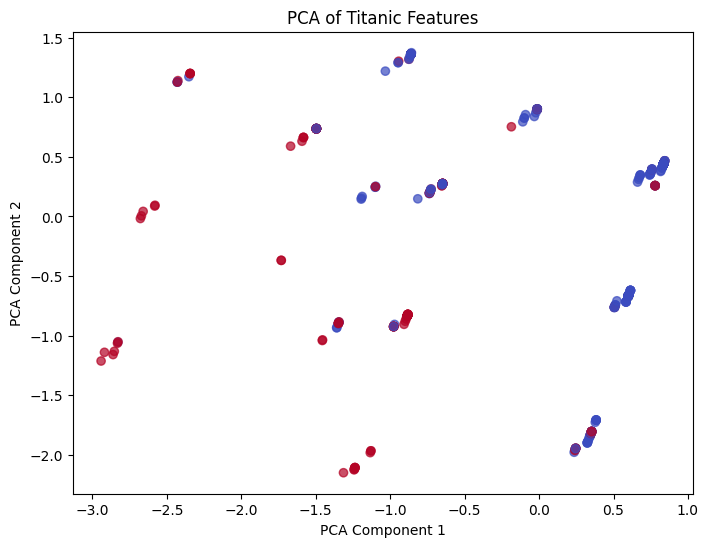

In [102]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_no_outliers, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Titanic Features')
plt.show()